In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
start_time = time.time()


In [415]:
# Load the roomwidth data (you'll need to manually load the dataset)
roomwidth = pd.read_csv("/Users/rahulkisandabilkar/Downloads/roomwidth.csv")  # Assuming the data is in CSV format

In [416]:
# Convert the estimates from meters to feet
convert = np.where(roomwidth['unit'] == 'feet', 1, 3.28)
roomwidth['width_converted'] = roomwidth['width'] * convert

In [417]:
# Summary statistics
summary_stats = roomwidth.groupby('unit')['width_converted'].describe()
print(summary_stats)

        count       mean        std    min    25%   50%    75%    max
unit                                                                 
feet     69.0  43.695652  12.497417  24.00  36.00  42.0  48.00   94.0
metres   44.0  52.554545  23.434443  26.24  36.08  49.2  55.76  131.2


In [418]:
# Standard deviations
std_devs = roomwidth.groupby('unit')['width_converted'].std()
print(std_devs)

unit
feet      12.497417
metres    23.434443
Name: width_converted, dtype: float64


Text(0.5, 1.0, 'Boxplot of Estimates')

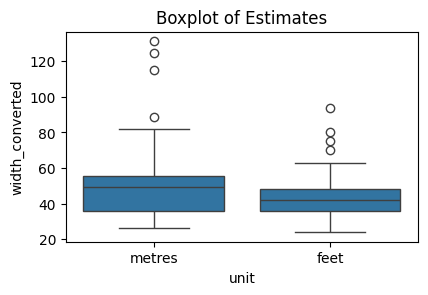

In [419]:
# Boxplots and Q-Q plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='unit', y='width_converted', data=roomwidth)
plt.title("Boxplot of Estimates")

Text(0.5, 1.0, 'Normal Q-Q Plot (Feet)')

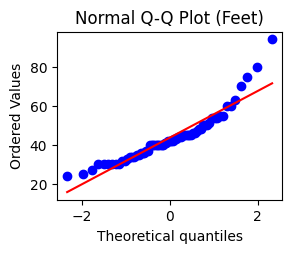

In [420]:
plt.subplot(2, 2, 3)
feet_data = roomwidth[roomwidth['unit'] == 'feet']['width']
stats.probplot(feet_data, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot (Feet)")

Text(0.5, 1.0, 'Normal Q-Q Plot (Metres)')

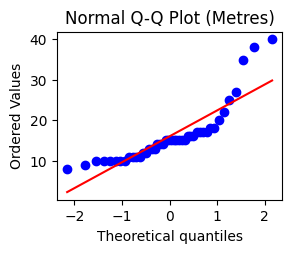

In [421]:
plt.subplot(2, 2, 4)
metres_data = roomwidth[roomwidth['unit'] != 'feet']['width']
stats.probplot(metres_data, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot (Metres)")

In [422]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [423]:
# Perform independent two-sample t-test
t_stat, p_val = stats.ttest_ind(
    roomwidth[roomwidth['unit'] == 'feet']['width_converted'],
    roomwidth[roomwidth['unit'] != 'feet']['width_converted'],
    equal_var=True)
print(f"Two Sample t-test: t-statistic={t_stat}, p-value={p_val}")


Two Sample t-test: t-statistic=-2.6146714459044005, p-value=0.010171723177660002


In [424]:
# Perform Welch's t-test
t_stat_welch, p_val_welch = stats.ttest_ind(
    roomwidth[roomwidth['unit'] == 'feet']['width_converted'],
    roomwidth[roomwidth['unit'] != 'feet']['width_converted'],
    equal_var=False)
print(f"Welch's t-test: t-statistic={t_stat_welch}, p-value={p_val_welch}")


Welch's t-test: t-statistic=-2.307068877727352, p-value=0.02459177661330135


In [425]:
# Perform Wilcoxon rank sum test
wilcoxon_stat, wilcoxon_pval = stats.ranksums(
    roomwidth[roomwidth['unit'] == 'feet']['width_converted'],
    roomwidth[roomwidth['unit'] != 'feet']['width_converted'])
print(f"Wilcoxon rank sum test: statistic={wilcoxon_stat}, p-value={wilcoxon_pval}")


Wilcoxon rank sum test: statistic=-2.1963226763528336, p-value=0.028068855773200584


In [426]:
# Load the waves data (you'll need to manually load the dataset)
waves = pd.read_csv("/Users/rahulkisandabilkar/Downloads/waves.csv")  # Assuming the data is in CSV format

In [427]:
# Calculate the differences between two methods
waves['diff'] = waves['method1'] - waves['method2']


Text(0.5, 1.0, 'Boxplot of Differences (Newton meters)')

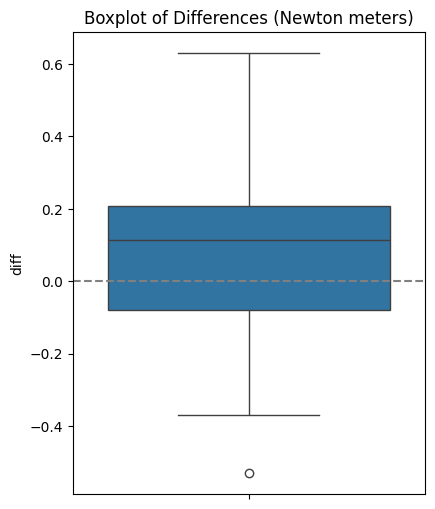

In [428]:
# Boxplot and Q-Q plot for differences
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=waves['diff'])
plt.axhline(0, ls='--', color='gray')
plt.title("Boxplot of Differences (Newton meters)")

Text(0.5, 1.0, 'Normal Q-Q Plot (Differences)')

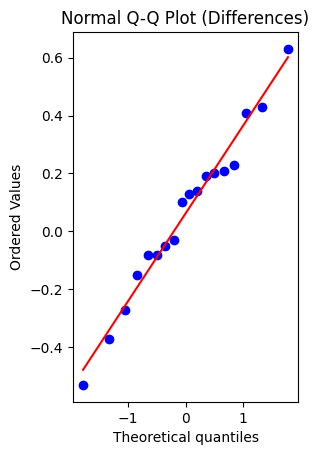

In [429]:
plt.subplot(1, 2, 2)
stats.probplot(waves['diff'], dist="norm", plot=plt)
plt.title("Normal Q-Q Plot (Differences)")


In [430]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [431]:
# Perform paired t-test
t_stat_waves, p_val_waves = stats.ttest_rel(waves['method1'], waves['method2'])
print(f"Paired t-test: t-statistic={t_stat_waves}, p-value={p_val_waves}")

Paired t-test: t-statistic=0.9019341810099345, p-value=0.3796934227954387


In [432]:
# Perform Wilcoxon signed-rank test
wilcoxon_stat_waves, wilcoxon_pval_waves = stats.wilcoxon(waves['method1'], waves['method2'])
print(f"Wilcoxon signed rank test: statistic={wilcoxon_stat_waves}, p-value={wilcoxon_pval_waves}")

Wilcoxon signed rank test: statistic=62.0, p-value=0.32472991943359375


In [433]:
# Load the water data (you'll need to manually load the dataset)
water = pd.read_csv("/Users/rahulkisandabilkar/Downloads/water.csv")  # Assuming the data is in CSV format


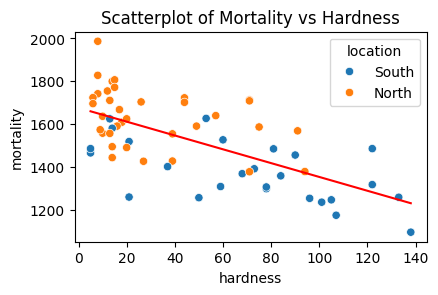

In [434]:
# Scatter plot, regression line, and marginal distributions
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x=water['hardness'], y=water['mortality'], hue=water['location'])
plt.title("Scatterplot of Mortality vs Hardness")
plt.plot(np.unique(water['hardness']), 
         np.poly1d(np.polyfit(water['hardness'], water['mortality'], 1))(np.unique(water['hardness'])), color='red')


Text(0.5, 1.0, 'Histogram of Water Hardness')

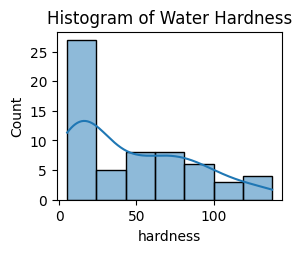

In [435]:
plt.subplot(2, 2, 2)
sns.histplot(water['hardness'], kde=True)
plt.title("Histogram of Water Hardness")


Text(0.5, 1.0, 'Boxplot of Mortality')

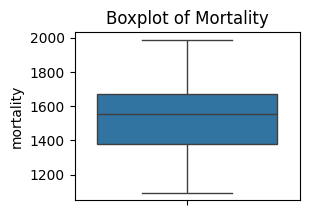

In [436]:
plt.subplot(2, 2, 4)
sns.boxplot(y=water['mortality'])
plt.title("Boxplot of Mortality")


In [437]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [438]:
# Perform Pearson's correlation test
correlation, p_val_corr = stats.pearsonr(water['hardness'], water['mortality'])
print(f"Pearson's correlation: r={correlation}, p-value={p_val_corr}")

Pearson's correlation: r=-0.6548486232042466, p-value=1.0331339260349354e-08


In [439]:
# Load the pistonrings data (you'll need to manually load the dataset)
pistonrings = pd.read_csv("/Users/rahulkisandabilkar/Downloads/pistonrings.csv")  # Assuming the data is in CSV format


In [440]:
# Perform chi-squared test
chi2_stat, chi2_pval, dof, expected = stats.chi2_contingency(pd.crosstab(pistonrings['compressor'], pistonrings['leg']))
print(f"Chi-squared test: chi2-statistic={chi2_stat}, p-value={chi2_pval}")


Chi-squared test: chi2-statistic=0.0, p-value=1.0


In [441]:
# Load the rearrests data (you'll need to manually load the dataset)
rearrests = pd.read_csv("/Users/rahulkisandabilkar/Downloads/rearrests.csv")  # Assuming the data is in CSV format


In [442]:
# Perform McNemar's test
from statsmodels.stats.contingency_tables import mcnemar
table = np.array([[158, 515], [290, 1134]])  # Input the values from rearrests dataset
result = mcnemar(table, exact=True)
print(f"McNemar's test: statistic={result.statistic}, p-value={result.pvalue}")


McNemar's test: statistic=290.0, p-value=1.917888994501383e-15


In [443]:
# Perform an exact binomial test
successes = 290
n = 805
binom_test = stats.binomtest(successes, n=n, p=0.5)
print(f"Exact binomial test: p-value={binom_test}")


Exact binomial test: p-value=BinomTestResult(k=290, n=805, alternative='two-sided', statistic=0.36024844720496896, pvalue=1.917888994501383e-15)


In [ ]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")
